In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_aer import Aer
%matplotlib inline

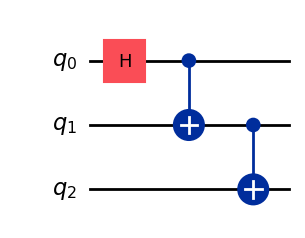

In [3]:
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

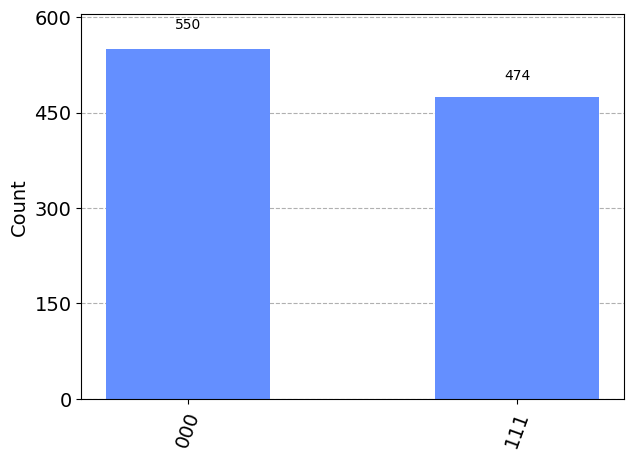

In [5]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, backend=simulator).result()
plot_histogram(result.get_counts())